In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

import pandas as pd
from datetime import datetime

import os
import ipywidgets as widgets

import tkinter as tk
from tkinter import filedialog as fd

In [2]:
# open file dialog
root = tk.Tk()
root.attributes('-topmost', True)
root.iconify()
file_name = fd.askopenfilename(parent=root, filetypes=[(".shp", ".shp")])
root.destroy()

In [3]:
file_name

'D:/OneDrive - Ingenio Azucarero Guabira S.A/UTEA_2023/CATASTRO/CATASTRO_2023-03-11.shp'

In [4]:
# leer el .shp seleccionado
data = gpd.read_file(file_name)

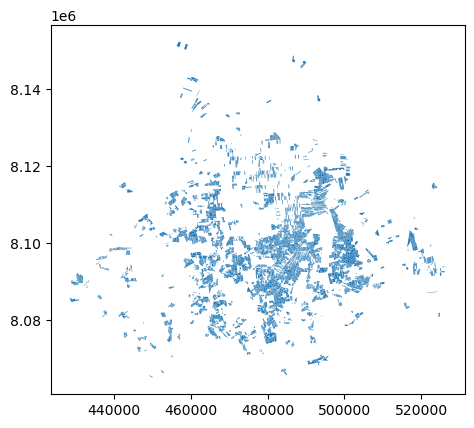

In [5]:
data.plot()
plt.show()

In [6]:
data.head(3)

,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,textura,financia,soca,cultivo,zona,area,fs,geometry
0,00005600000L1.3,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.3,UCG_90-20,FY,IAG,4,canha,79,0.771315,2018-05-30,"POLYGON Z ((491741.706 8084531.788 0.000, 4916..."
1,00005600000L1.5,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.5,UCG_90-20,FY,None,11,canha,79,3.831973,2011-05-20,"POLYGON Z ((491971.566 8084838.542 0.000, 4920..."
2,00005600000L2.2,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L2.2,CITTCA_85-22,FY,IAG,4,canha,79,2.245713,2018-05-20,"POLYGON Z ((492266.427 8084941.630 0.000, 4923..."


In [7]:
data.crs.name

'WGS 84 / UTM zone 20S'

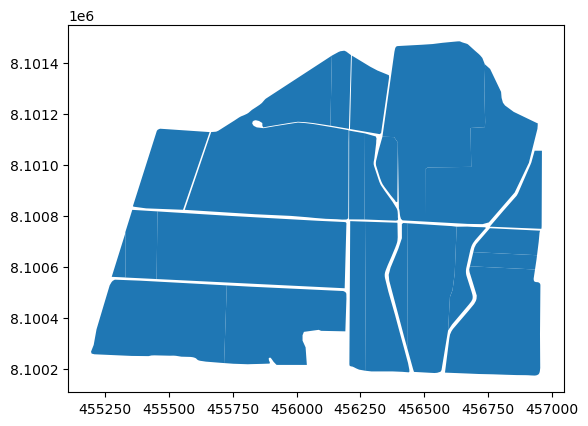

In [96]:
propiedad = data[data['unidad_01']==326]
propiedad.plot()
plt.show()

In [97]:
def quitar_caracteres(text):
    text = text.replace('_', ' ')
    text = text.replace('"', '')
    text = text.replace('.', '')
    return text

In [98]:
#CONVERTIR LOS TIPOS DE VARIABLE
propiedad = propiedad.astype({
    'unidad_01':'int',
    'unidad_03':'int'
})

In [99]:
propiedad.head(3)

,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,textura,financia,soca,cultivo,zona,area,fs,geometry
6285,00003260000L4.2,326,EL_SUMUQUE--RUDIGER_TREPP,3323,TREPP_CARRASCO_RUDIGER,L4.2,UCG_90-20,FY,IAG,4,canha,50,6.942056,2018-10-09,"POLYGON Z ((456268.502 8100194.616 0.000, 4562..."
6286,00003260000L3.1,326,EL_SUMUQUE--RUDIGER_TREPP,13165,SUAREZ_OYHAMBURU_ROLANDO_NATANIE,L3.1,UCG_90-20,FY,IAG,3,canha,50,25.831934,2019-05-18,"POLYGON Z ((455879.107 8101261.212 0.000, 4561..."
6287,00003260000L3.2,326,EL_SUMUQUE--RUDIGER_TREPP,3323,TREPP_CARRASCO_RUDIGER,L3.2,RBB_77-26,FY,PROPIO,2,canha,50,6.290497,2020-04-15,"POLYGON Z ((455409.641 8100831.153 0.000, 4553..."


In [100]:
file_name = str(propiedad.iloc[0]['unidad_01']) + '_' + propiedad.iloc[0]['unidad_02']
file_name

'326_EL_SUMUQUE--RUDIGER_TREPP'

In [101]:
propiedad = propiedad.rename(columns={'id':'cod', 'variedad':'var', 'textura':'tex'})
propiedad.head(5)

,cod,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,var,tex,financia,soca,cultivo,zona,area,fs,geometry
6285,00003260000L4.2,326,EL_SUMUQUE--RUDIGER_TREPP,3323,TREPP_CARRASCO_RUDIGER,L4.2,UCG_90-20,FY,IAG,4,canha,50,6.942056,2018-10-09,"POLYGON Z ((456268.502 8100194.616 0.000, 4562..."
6286,00003260000L3.1,326,EL_SUMUQUE--RUDIGER_TREPP,13165,SUAREZ_OYHAMBURU_ROLANDO_NATANIE,L3.1,UCG_90-20,FY,IAG,3,canha,50,25.831934,2019-05-18,"POLYGON Z ((455879.107 8101261.212 0.000, 4561..."
6287,00003260000L3.2,326,EL_SUMUQUE--RUDIGER_TREPP,3323,TREPP_CARRASCO_RUDIGER,L3.2,RBB_77-26,FY,PROPIO,2,canha,50,6.290497,2020-04-15,"POLYGON Z ((455409.641 8100831.153 0.000, 4553..."
6288,00003260000L9.1,326,EL_SUMUQUE--RUDIGER_TREPP,3323,TREPP_CARRASCO_RUDIGER,L9.1,UCG_90-20,FY,IAG,4,canha,50,2.164155,2018-10-15,"POLYGON Z ((456138.394 8101430.181 0.000, 4561..."
6289,00003260000L5.2,326,EL_SUMUQUE--RUDIGER_TREPP,13165,SUAREZ_OYHAMBURU_ROLANDO_NATANIE,L5.2,UCG_90-20,FY,IAG,3,canha,50,2.318431,2019-04-02,"POLYGON Z ((456266.293 8100787.560 0.000, 4562..."


In [102]:
num_columnas = len(propiedad.columns)
num_columnas

15

In [103]:
propiedad['NOM_LOTE'] = propiedad['unidad_05']
propiedad['TEXTURA'] = propiedad['tex']
propiedad['SUPERFICIE'] = propiedad['area']
propiedad['VARIEDAD'] = propiedad['var']
propiedad['FECHA_SIEM'] = propiedad['fs']
propiedad['CORTE'] = propiedad['soca']
propiedad['ESTADO'] = ''
propiedad['RENDIMIENT'] = 0
propiedad['COD_CA'] = propiedad['unidad_03']
propiedad['COD_PROP'] = propiedad['unidad_01']
propiedad['ID'] = propiedad['cod']
propiedad['CUADRANTE'] = 0

In [104]:
propiedad.head(3)

,cod,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,var,tex,financia,soca,...,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
6285,00003260000L4.2,326,EL_SUMUQUE--RUDIGER_TREPP,3323,TREPP_CARRASCO_RUDIGER,L4.2,UCG_90-20,FY,IAG,4,...,6.942056,UCG_90-20,2018-10-09,4,,0,3323,326,00003260000L4.2,0
6286,00003260000L3.1,326,EL_SUMUQUE--RUDIGER_TREPP,13165,SUAREZ_OYHAMBURU_ROLANDO_NATANIE,L3.1,UCG_90-20,FY,IAG,3,...,25.831934,UCG_90-20,2019-05-18,3,,0,13165,326,00003260000L3.1,0
6287,00003260000L3.2,326,EL_SUMUQUE--RUDIGER_TREPP,3323,TREPP_CARRASCO_RUDIGER,L3.2,RBB_77-26,FY,PROPIO,2,...,6.290497,RBB_77-26,2020-04-15,2,,0,3323,326,00003260000L3.2,0


In [105]:
propiedad.columns

Index(['cod', 'unidad_01', 'unidad_02', 'unidad_03', 'unidad_04', 'unidad_05',
       'var', 'tex', 'financia', 'soca', 'cultivo', 'zona', 'area', 'fs',
       'geometry', 'NOM_LOTE', 'TEXTURA', 'SUPERFICIE', 'VARIEDAD',
       'FECHA_SIEM', 'CORTE', 'ESTADO', 'RENDIMIENT', 'COD_CA', 'COD_PROP',
       'ID', 'CUADRANTE'],
      dtype='object')

In [106]:
propiedad = propiedad.iloc[:,num_columnas-1:]

In [107]:
propiedad.head(5)

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
6285,"POLYGON Z ((456268.502 8100194.616 0.000, 4562...",L4.2,FY,6.942056,UCG_90-20,2018-10-09,4,,0,3323,326,00003260000L4.2,0
6286,"POLYGON Z ((455879.107 8101261.212 0.000, 4561...",L3.1,FY,25.831934,UCG_90-20,2019-05-18,3,,0,13165,326,00003260000L3.1,0
6287,"POLYGON Z ((455409.641 8100831.153 0.000, 4553...",L3.2,FY,6.290497,RBB_77-26,2020-04-15,2,,0,3323,326,00003260000L3.2,0
6288,"POLYGON Z ((456138.394 8101430.181 0.000, 4561...",L9.1,FY,2.164155,UCG_90-20,2018-10-15,4,,0,3323,326,00003260000L9.1,0
6289,"POLYGON Z ((456266.293 8100787.560 0.000, 4562...",L5.2,FY,2.318431,UCG_90-20,2019-04-02,3,,0,13165,326,00003260000L5.2,0


In [108]:
# dependiendo del año de la fecha de siembra, retorna 'HOJA', 'SOCA' o 'RENOVACION'
def establecer_estado(fecha):
    date = str(fecha)
    try:
        date = datetime.strptime(date, '%Y-%m-%d')
        year = date.year
        if year == 2022:
            return 'HOJA'
        elif year > 2000:
            return 'SOCA'
        else:
            return 'RENOVACION'
    except Exception as ex:
        return 'RENOVACION'

In [109]:
def establecer_formato_fecha(fecha):
    fecha = str(fecha)
    if fecha == 'None':
        return '0'
    else:
        return fecha.replace('-', '')

In [110]:
propiedad['ESTADO'] = propiedad['FECHA_SIEM'].apply(establecer_estado)
propiedad['FECHA_SIEM'] = propiedad['FECHA_SIEM'].apply(establecer_formato_fecha)

In [111]:
propiedad.head()

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
6285,"POLYGON Z ((456268.502 8100194.616 0.000, 4562...",L4.2,FY,6.942056,UCG_90-20,20181009,4,SOCA,0,3323,326,00003260000L4.2,0
6286,"POLYGON Z ((455879.107 8101261.212 0.000, 4561...",L3.1,FY,25.831934,UCG_90-20,20190518,3,SOCA,0,13165,326,00003260000L3.1,0
6287,"POLYGON Z ((455409.641 8100831.153 0.000, 4553...",L3.2,FY,6.290497,RBB_77-26,20200415,2,SOCA,0,3323,326,00003260000L3.2,0
6288,"POLYGON Z ((456138.394 8101430.181 0.000, 4561...",L9.1,FY,2.164155,UCG_90-20,20181015,4,SOCA,0,3323,326,00003260000L9.1,0
6289,"POLYGON Z ((456266.293 8100787.560 0.000, 4562...",L5.2,FY,2.318431,UCG_90-20,20190402,3,SOCA,0,13165,326,00003260000L5.2,0


In [112]:
fp_tch = r'D:\OneDrive - Ingenio Azucarero Guabira S.A\APP CAÑERO\PROPIEDADES\DATOS_PARA_GENERAR_GEOJSON\RENDIMIENTO AVANCE 071022.xlsx'

In [113]:
tchs = pd.read_excel(fp_tch)

In [114]:
tchs.head(3)

,COD_AVANCE,CODIGO CAÑERO,INS,NOMBRE CAÑERO,DESSIG,CREA,COMPROMISO GRUPAL,COMPROMISO INDIVIDUAL,HA CANHA POR GRUPO,HA CANHA INDIVIDUAL,...,TN ENTREGADAS INDIVIDUAL,% ENTREGA GRUPAL,HA COSECHA GRUPAL,HA COSECHA INDIVIDUAL,% COSECHA GRUPAL,RENDIMIENTO 2022,RENDIMIENTO 2021,ESTIMATIVA RENDIMIENTO 2022,OBSERVACIONES,Unnamed: 20
0,131_1,2224,NaN,CRUZ VARGAS WILLY WALDO,NaN,NaN,7067.07,0.00,NaN,NaN,...,42.86,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,81_36,41555,81.0,FRANCO GUZMAN CARLA DANIELA,NaN,NaN,7053.98,7053.98,0.0,0.0,...,7138.06,1.011920,0.0,0.0,NaN,NaN,0.000000,59.896088,SIN CATASTRO,NaN
2,50_29,15501,50.0,WENDE RIOJA MAURICIO,NaN,NaN,4525.38,4525.38,0.0,0.0,...,3537.96,0.781804,0.0,0.0,NaN,NaN,39.153575,0.000000,SIN CATASTRO,NaN


In [115]:
def cargar_tch(cod_ca):
    tch = float(tchs[tchs['CODIGO CAÑERO'] == cod_ca].iloc[:,16])
    try:
        tch_float = float(tch)
        return tch_float
    except:
        return 0

In [116]:
#CONVERTIR LOS TIPOS DE VARIABLE
propiedad = propiedad.astype({
    'RENDIMIENT':'float',
    'COD_CA':'int',
    'COD_PROP':'int'
})

In [117]:
propiedad['RENDIMIENT'] = propiedad['COD_CA'].apply(cargar_tch)
propiedad.head(3)

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
6285,"POLYGON Z ((456268.502 8100194.616 0.000, 4562...",L4.2,FY,6.942056,UCG_90-20,20181009,4,SOCA,64.860907,3323,326,00003260000L4.2,0
6286,"POLYGON Z ((455879.107 8101261.212 0.000, 4561...",L3.1,FY,25.831934,UCG_90-20,20190518,3,SOCA,64.860907,13165,326,00003260000L3.1,0
6287,"POLYGON Z ((455409.641 8100831.153 0.000, 4553...",L3.2,FY,6.290497,RBB_77-26,20200415,2,SOCA,64.860907,3323,326,00003260000L3.2,0


In [118]:
fp_bloques = r'D:\OneDrive - Ingenio Azucarero Guabira S.A\APP CAÑERO\PROPIEDADES\DATOS_PARA_GENERAR_GEOJSON\BLOQUES.xlsx'

In [119]:
bloques = pd.read_excel(fp_bloques)

In [120]:
bloques.head(3)

,idnax,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,fc,...,agua_disp,agua_aprov,agua_act,estrato,tipo_cos,resiembra_pct,fk_pixel,activo,fk_estacion,inicio_curva
0,276044,00005600000L1.3,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.3,UCG_90-20,44038,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,618227,True,NaN,NaN
1,276045,00005600000L1.5,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.5,UCG_90-20,44431,44431.0,...,NaN,NaN,NaN,NaN,NaN,NaN,618227,True,NaN,NaN
2,276046,00005600000L2.2,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L2.2,CITTCA_85-22,44431,44431.0,...,NaN,NaN,NaN,NaN,NaN,NaN,618227,True,NaN,NaN


In [121]:
def cargar_bloque(cod_prop):
    bloque = bloques[bloques['unidad_01']==cod_prop].head(1).loc[:,'cuadrante']
    try:
        bloque_int = int(bloque)
        return bloque_int
    except:
        return 0

In [122]:
propiedad['CUADRANTE']=propiedad['COD_PROP'].apply(cargar_bloque)
propiedad.head(3)

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
6285,"POLYGON Z ((456268.502 8100194.616 0.000, 4562...",L4.2,FY,6.942056,UCG_90-20,20181009,4,SOCA,64.860907,3323,326,00003260000L4.2,359
6286,"POLYGON Z ((455879.107 8101261.212 0.000, 4561...",L3.1,FY,25.831934,UCG_90-20,20190518,3,SOCA,64.860907,13165,326,00003260000L3.1,359
6287,"POLYGON Z ((455409.641 8100831.153 0.000, 4553...",L3.2,FY,6.290497,RBB_77-26,20200415,2,SOCA,64.860907,3323,326,00003260000L3.2,359


In [123]:
propiedad['ID'] = propiedad.apply(lambda x : '0000' + str(x['COD_PROP']) + '0000' + x['NOM_LOTE'], axis=1)

In [124]:
propiedad.head(3)

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
6285,"POLYGON Z ((456268.502 8100194.616 0.000, 4562...",L4.2,FY,6.942056,UCG_90-20,20181009,4,SOCA,64.860907,3323,326,00003260000L4.2,359
6286,"POLYGON Z ((455879.107 8101261.212 0.000, 4561...",L3.1,FY,25.831934,UCG_90-20,20190518,3,SOCA,64.860907,13165,326,00003260000L3.1,359
6287,"POLYGON Z ((455409.641 8100831.153 0.000, 4553...",L3.2,FY,6.290497,RBB_77-26,20200415,2,SOCA,64.860907,3323,326,00003260000L3.2,359


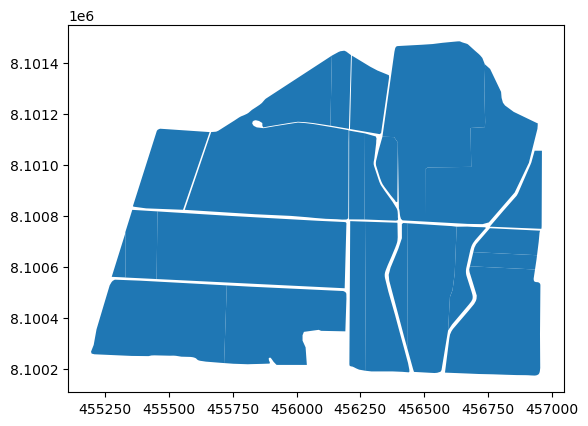

In [125]:
propiedad.plot()
plt.show()

In [126]:
#quitar_caracteres
propiedad['VARIEDAD'] = propiedad['VARIEDAD'].apply(quitar_caracteres)

In [127]:
propiedad

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
6285,"POLYGON Z ((456268.502 8100194.616 0.000, 4562...",L4.2,FY,6.942056,UCG 90-20,20181009,4,SOCA,64.860907,3323,326,00003260000L4.2,359
6286,"POLYGON Z ((455879.107 8101261.212 0.000, 4561...",L3.1,FY,25.831934,UCG 90-20,20190518,3,SOCA,64.860907,13165,326,00003260000L3.1,359
6287,"POLYGON Z ((455409.641 8100831.153 0.000, 4553...",L3.2,FY,6.290497,RBB 77-26,20200415,2,SOCA,64.860907,3323,326,00003260000L3.2,359
6288,"POLYGON Z ((456138.394 8101430.181 0.000, 4561...",L9.1,FY,2.164155,UCG 90-20,20181015,4,SOCA,64.860907,3323,326,00003260000L9.1,359
6289,"POLYGON Z ((456266.293 8100787.560 0.000, 4562...",L5.2,FY,2.318431,UCG 90-20,20190402,3,SOCA,64.860907,13165,326,00003260000L5.2,359
6290,"POLYGON Z ((456267.944 8101125.084 0.000, 4562...",L5.1,FY,2.104188,UCG 90-20,20181005,4,SOCA,64.860907,3323,326,00003260000L5.1,359
6291,"POLYGON Z ((456361.621 8101353.270 0.000, 4563...",L9.2,FY,3.533780,UCG 90-20,20181015,4,SOCA,64.860907,3323,326,00003260000L9.2,359
6292,"POLYGON Z ((456401.045 8100830.898 0.000, 4563...",L7.1.1,FY,18.915092,UCG 90-20,20190520,3,SOCA,64.860907,40141,326,00003260000L7.1.1,359
6293,"POLYGON Z ((456433.269 8100284.780 0.000, 4564...",L6.1,FY,9.659763,UCG 90-20,20181015,4,SOCA,64.860907,3323,326,00003260000L6.1,359
6294,"POLYGON Z ((456609.231 8100375.858 0.000, 4565...",L6.2,FY,2.419862,UCG 90-20,20190518,3,SOCA,64.860907,13165,326,00003260000L6.2,359


In [128]:
propiedad.head()

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
6285,"POLYGON Z ((456268.502 8100194.616 0.000, 4562...",L4.2,FY,6.942056,UCG 90-20,20181009,4,SOCA,64.860907,3323,326,00003260000L4.2,359
6286,"POLYGON Z ((455879.107 8101261.212 0.000, 4561...",L3.1,FY,25.831934,UCG 90-20,20190518,3,SOCA,64.860907,13165,326,00003260000L3.1,359
6287,"POLYGON Z ((455409.641 8100831.153 0.000, 4553...",L3.2,FY,6.290497,RBB 77-26,20200415,2,SOCA,64.860907,3323,326,00003260000L3.2,359
6288,"POLYGON Z ((456138.394 8101430.181 0.000, 4561...",L9.1,FY,2.164155,UCG 90-20,20181015,4,SOCA,64.860907,3323,326,00003260000L9.1,359
6289,"POLYGON Z ((456266.293 8100787.560 0.000, 4562...",L5.2,FY,2.318431,UCG 90-20,20190402,3,SOCA,64.860907,13165,326,00003260000L5.2,359


In [129]:
propiedad.crs

<Projected CRS: EPSG:32720>
Name: WGS 84 / UTM zone 20S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 66°W and 60°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Falkland Islands (Malvinas). Paraguay.
- bounds: (-66.0, -80.0, -60.0, 0.0)
Coordinate Operation:
- name: UTM zone 20S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [130]:
propiedad = propiedad.to_crs(epsg=4326)

In [131]:
propiedad.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [132]:
propiedad['SUPERFICIE'].sum()

169.249062165974

In [133]:
file_name + '.geojson'

'326_EL_SUMUQUE--RUDIGER_TREPP.geojson'

In [134]:
#file_name='d'

In [135]:
os.chdir(r"D:\OneDrive - Ingenio Azucarero Guabira S.A\APP CAÑERO\PROPIEDADES\DATOS_PARA_GENERAR_GEOJSON\PROPIEDADES_OFFICIALES")

In [136]:
out_dir = os.path.normpath((os.getcwd() + '/' + file_name + '.geojson' ))

In [137]:
out_dir

'D:\\OneDrive - Ingenio Azucarero Guabira S.A\\APP CAÑERO\\PROPIEDADES\\DATOS_PARA_GENERAR_GEOJSON\\PROPIEDADES_OFFICIALES\\326_EL_SUMUQUE--RUDIGER_TREPP.geojson'

In [139]:
propiedad.to_file(out_dir, driver='GeoJSON')